### Student Activity: Portfolio Planner Part 2

This program is part 2 of a two-part student activity and continues the following:

`PART I: Portfolio Optimization via Risk Evaluation`

Reads in the CSV datasets of 10 stocks, calculates the volatility of each stock, drops the top-five highly volatile stocks, sets allocations for the remaining stocks based on risk/volatility, and calculates the returns of a hypothetical `$10,000` investment for the constructed portfolio.

`PART II: Portfolio Optimization via Correlation and Return-to-Risk (Sharpe Ratio) Evaluations`

Alternatively filters the same 10 stocks (from part 1) down to only minimally-correlated stocks with higher sharpe ratios, and calculates the returns of a hypothetical `$10,000` investment for the constructed optimized portfolio. Returns of the optimized portfolio are then compared to lesser-optimized portfolios.

---

### PART 1: Portfolio Optimization via Risk Evaluation

In [1]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
%matplotlib inline

### Read CSVs as DataFrames 

In [2]:
# Set the file paths
bk_data = Path(r"C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 4\1\08-Stu_Portfolio_Planner\Resources\bk_data.csv")
fang_data = Path(r"C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 4\1\08-Stu_Portfolio_Planner\Resources\fang_data.csv")
jnj_data = Path(r"C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 4\1\08-Stu_Portfolio_Planner\Resources\jnj_data.csv")
luv_data = Path(r"C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 4\1\08-Stu_Portfolio_Planner\Resources\luv_data.csv")
mu_data = Path(r"C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 4\1\08-Stu_Portfolio_Planner\Resources\mu_data.csv")
nke_data = Path(r"C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 4\1\08-Stu_Portfolio_Planner\Resources\nke_data.csv")
sbux_data = Path(r"C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 4\1\08-Stu_Portfolio_Planner\Resources\sbux_data.csv")
t_data = Path(r"C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 4\1\08-Stu_Portfolio_Planner\Resources\t_data.csv")
wdc_data = Path(r"C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 4\1\08-Stu_Portfolio_Planner\Resources\wdc_data.csv")
wrk_data = Path(r"C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 4\1\08-Stu_Portfolio_Planner\Resources\wrk_data.csv")

# Read the CSVs and set the `date` column as a datetime index to the DataFrame
bk_df = pd.read_csv(bk_data, index_col="date", infer_datetime_format=True, parse_dates=True)
fang_df = pd.read_csv(fang_data, index_col="date", infer_datetime_format=True, parse_dates=True)
jnj_df = pd.read_csv(jnj_data, index_col="date", infer_datetime_format=True, parse_dates=True)
luv_df = pd.read_csv(luv_data, index_col="date", infer_datetime_format=True, parse_dates=True)
mu_df = pd.read_csv(mu_data, index_col="date", infer_datetime_format=True, parse_dates=True)
nke_df = pd.read_csv(nke_data, index_col="date", infer_datetime_format=True, parse_dates=True)
sbux_df = pd.read_csv(sbux_data, index_col="date", infer_datetime_format=True, parse_dates=True)
t_df = pd.read_csv(t_data, index_col="date", infer_datetime_format=True, parse_dates=True)
wdc_df = pd.read_csv(wdc_data, index_col="date", infer_datetime_format=True, parse_dates=True)
wrk_df = pd.read_csv(wrk_data, index_col="date", infer_datetime_format=True, parse_dates=True)

# Display a few rows
wrk_df.head()

,close
date,
2019-05-20,35.15
2019-05-17,36.66
2019-05-16,37.42
2019-05-15,37.44
2019-05-14,37.19


### Combine DataFrames, Sort Index, and Rename Columns

In [5]:
# Create a new pivot table where the columns are the closing prices for each ticker
combined_df = pd.concat([bk_df, fang_df, luv_df, mu_df, nke_df, sbux_df, t_df, wdc_df, wrk_df], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
combined_df.sort_index(inplace=True)

# Set column names
combined_df.columns = ['BK', 'FANG', 'LUV', 'MU', 'NKE', 'SBUX', 'T', 'WDC', 'WRK']

# Display a few rows
combined_df.head()

,BK,FANG,LUV,MU,NKE,SBUX,T,WDC,WRK
date,,,,,,,,,
2015-06-24,43.29,77.955,34.35,24.06,53.110,53.710,35.78,87.73,58.5699
2015-06-25,42.85,76.390,34.49,24.02,52.610,54.070,36.18,85.95,57.2022
2015-06-26,42.98,75.250,34.32,19.66,54.855,54.620,36.12,84.45,57.2022
2015-06-29,41.79,75.160,33.18,18.73,53.835,53.550,35.77,81.96,56.1857
2015-06-30,41.97,75.380,33.09,18.84,54.010,53.615,35.52,78.42,56.2781


### Calculate Daily Returns

In [6]:
# Use the `pct_change` function to calculate daily returns
daily_returns = combined_df.pct_change()
daily_returns.head()

,BK,FANG,LUV,MU,NKE,SBUX,T,WDC,WRK
date,,,,,,,,,
2015-06-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-25,-0.010164,-0.020076,0.004076,-0.001663,-0.009414,0.006703,0.011179,-0.020290,-0.023352
2015-06-26,0.003034,-0.014923,-0.004929,-0.181515,0.042672,0.010172,-0.001658,-0.017452,0.000000
2015-06-29,-0.027687,-0.001196,-0.033217,-0.047304,-0.018594,-0.019590,-0.009690,-0.029485,-0.017770
2015-06-30,0.004307,0.002927,-0.002712,0.005873,0.003251,0.001214,-0.006989,-0.043192,0.001645


### Evaluate Riskiness of Stocks

In [7]:
# Use the `std` function and multiply by the square root of the number of trading days in a year to get annualized volatility
volatility = daily_returns.std() * np.sqrt(252)
volatility.sort_values(inplace=True)
volatility

T       0.187579
SBUX    0.206805
BK      0.224967
NKE     0.246045
LUV     0.280021
WRK     0.303601
FANG    0.370840
WDC     0.415605
MU      0.479955
dtype: float64

### Drop High Volatility Stocks

In [8]:
# Drop the 5 stocks with the highest volatility in daily returns
daily_returns.drop(columns=['MU', 'WDC', 'FANG', 'WRK', 'LUV'], inplace=True)
daily_returns.head()

,BK,NKE,SBUX,T
date,,,,
2015-06-24,NaN,NaN,NaN,NaN
2015-06-25,-0.010164,-0.009414,0.006703,0.011179
2015-06-26,0.003034,0.042672,0.010172,-0.001658
2015-06-29,-0.027687,-0.018594,-0.019590,-0.009690
2015-06-30,0.004307,0.003251,0.001214,-0.006989


### Set Portfolio Allocations/Weights and Calculate Portfolio Daily Returns

In [10]:
# Set weights for corresponding risk profile of stocks, use the `dot` function to sum the product each weight and the corresponding stock daily return
# BK, JNJ, NKE, SBUX, T
weights = [0.15, 0.05, 0.10, 0.2]
portfolio_returns = daily_returns.dot(weights)
portfolio_returns.head()

date
2015-06-24         NaN
2015-06-25    0.000911
2015-06-26    0.003274
2015-06-29   -0.008980
2015-06-30   -0.000468
dtype: float64

### Calculate Cumulative Returns

In [11]:
# Use the `cumprod` function to calculate cumulative returns
cumulative_returns = (1 + portfolio_returns).cumprod()
cumulative_returns.head()

date
2015-06-24         NaN
2015-06-25    1.000911
2015-06-26    1.004188
2015-06-29    0.995171
2015-06-30    0.994705
dtype: float64

### Plot Return of Portfolio Starting with Initial Investment of `$10,000`

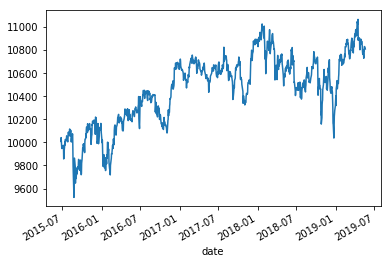

In [12]:
# Plot the returns of the portfolio in terms of money
initial_investment = 10000
cumulative_profit = initial_investment * cumulative_returns
cumulative_profit.plot()

---

### PART 2: Portfolio Optimization via Correlation and Return-to-risk (sharpe ratio) Evaluations

### Reset Daily Returns DataFrame

In [13]:
# Re-calculate daily returns as the DataFrame was modified in part 1
daily_returns2 = combined_df.pct_change()
daily_returns2

,BK,FANG,LUV,MU,NKE,SBUX,T,WDC,WRK
date,,,,,,,,,
2015-06-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-25,-0.010164,-0.020076,0.004076,-0.001663,-0.009414,0.006703,0.011179,-0.020290,-0.023352
2015-06-26,0.003034,-0.014923,-0.004929,-0.181515,0.042672,0.010172,-0.001658,-0.017452,0.000000
2015-06-29,-0.027687,-0.001196,-0.033217,-0.047304,-0.018594,-0.019590,-0.009690,-0.029485,-0.017770
2015-06-30,0.004307,0.002927,-0.002712,0.005873,0.003251,0.001214,-0.006989,-0.043192,0.001645
...,...,...,...,...,...,...,...,...,...
2019-05-14,-0.002969,0.017817,0.011951,0.030230,0.013813,0.004956,0.020348,0.038148,0.029623
2019-05-15,-0.010636,-0.000458,0.006970,-0.002597,0.004064,0.009084,0.005146,0.019270,0.006722
2019-05-16,0.000645,0.014396,0.011152,-0.028638,0.003214,0.014660,0.011840,-0.008793,-0.000534


### Evaluate Correlation of Stock Returns

In [14]:
# Use the `corr` function to calculate the correlation between stock returns
correlation = daily_returns2.corr()
correlation

,BK,FANG,LUV,MU,NKE,SBUX,T,WDC,WRK
BK,1.000000,0.317462,0.390731,0.339511,0.352312,0.361186,0.284662,0.373527,0.473280
FANG,0.317462,1.000000,0.170001,0.258782,0.227929,0.211263,0.187070,0.260423,0.294045
LUV,0.390731,0.170001,1.000000,0.296751,0.285755,0.314467,0.220850,0.273768,0.294395
MU,0.339511,0.258782,0.296751,1.000000,0.196334,0.247012,0.174143,0.609577,0.405658
NKE,0.352312,0.227929,0.285755,0.196334,1.000000,0.398614,0.240217,0.242891,0.271221
SBUX,0.361186,0.211263,0.314467,0.247012,0.398614,1.000000,0.238597,0.281220,0.303981
T,0.284662,0.187070,0.220850,0.174143,0.240217,0.238597,1.000000,0.153232,0.281383
WDC,0.373527,0.260423,0.273768,0.609577,0.242891,0.281220,0.153232,1.000000,0.397666
WRK,0.473280,0.294045,0.294395,0.405658,0.271221,0.303981,0.281383,0.397666,1.000000


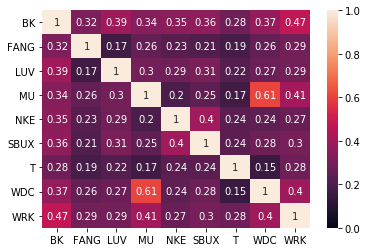

In [18]:
# Use the `heatmap` function from the Seaborn library to visualize the correlation table
sns.heatmap(correlation, vmin=0, vmax=1, annot=True)

In [22]:
# Alternatively, sum total correlation for each stock
correlation_sum = sum(correlation)

T       3.123182
FANG    3.145768
LUV     3.494862
NKE     3.512710
JNJ     3.518928
MU      3.700211
SBUX    3.722712
WDC     3.814908
WRK     4.017159
BK      4.242129
dtype: float64

In [17]:
correlation_sum = statisti(correlation)
correlation_sum

TypeError: unsupported operand type(s) for +: 'int' and 'str'

### Drop the Two Most Consistently Correlated Stocks

In [19]:
# Drop highly correlated stocks and keep only the non-correlated stocks
daily_returns2_drop_col = daily_returns2.drop(columns=['MU', 'WDC'])
daily_returns2_drop_col

,BK,FANG,LUV,NKE,SBUX,T,WRK
date,,,,,,,
2015-06-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-25,-0.010164,-0.020076,0.004076,-0.009414,0.006703,0.011179,-0.023352
2015-06-26,0.003034,-0.014923,-0.004929,0.042672,0.010172,-0.001658,0.000000
2015-06-29,-0.027687,-0.001196,-0.033217,-0.018594,-0.019590,-0.009690,-0.017770
2015-06-30,0.004307,0.002927,-0.002712,0.003251,0.001214,-0.006989,0.001645
...,...,...,...,...,...,...,...
2019-05-14,-0.002969,0.017817,0.011951,0.013813,0.004956,0.020348,0.029623
2019-05-15,-0.010636,-0.000458,0.006970,0.004064,0.009084,0.005146,0.006722
2019-05-16,0.000645,0.014396,0.011152,0.003214,0.014660,0.011840,-0.000534


### Evaluate Reward-to-Risk (Sharpe Ratio) of Minimally-Correlated Stocks

In [21]:
# Use the `mean` and `std` functions to calculate the annualized sharpe ratio
sharpe_ratio2 = (daily_returns2_drop_col.mean() * 252) / (daily_returns2_drop_col.std() * np.sqrt(252))
sharpe_ratio2.sort_values()

WRK    -0.278511
T      -0.050216
BK      0.181757
FANG    0.421292
LUV     0.520850
SBUX    0.545402
NKE     0.585923
dtype: float64

### Drop the Three Lowest Sharpe Ratio Stocks

In [22]:
# Drop the lowest sharpe ratio stocks and keep only the postive sharpe ratio stocks
drop_low_three = daily_returns2_drop_col.drop(columns=['WRK', 'T', 'BK'])
drop_low_three

,FANG,LUV,NKE,SBUX
date,,,,
2015-06-24,NaN,NaN,NaN,NaN
2015-06-25,-0.020076,0.004076,-0.009414,0.006703
2015-06-26,-0.014923,-0.004929,0.042672,0.010172
2015-06-29,-0.001196,-0.033217,-0.018594,-0.019590
2015-06-30,0.002927,-0.002712,0.003251,0.001214
...,...,...,...,...
2019-05-14,0.017817,0.011951,0.013813,0.004956
2019-05-15,-0.000458,0.006970,0.004064,0.009084
2019-05-16,0.014396,0.011152,0.003214,0.014660


### Evaluate Investment in Minimally-Correlated (Diversified) and Return-to-Risk (Sharpe Ratio) Optimized Portfolio

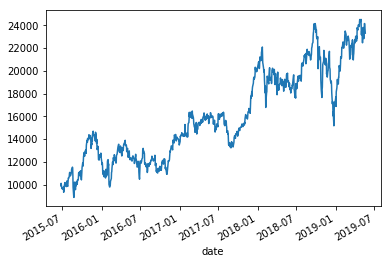

In [26]:
# Set Portfolio Weights, Calculate Daily and Cumulative Portfolio Returns, and Plot $10,000 Investment Over Time for Optimized Portfolio
weights1 = [0.42, 0.52, 0.58, 0.55]

portfolio_returns1 = drop_low_three.dot(weights1)

cum_return1 = (1 + portfolio_returns1).cumprod()

cum_prof1 = cum_return1 * 10000
cum_prof1.plot()

### Evaluate Investment in Minimally-Correlated (Diversified) Portfolio

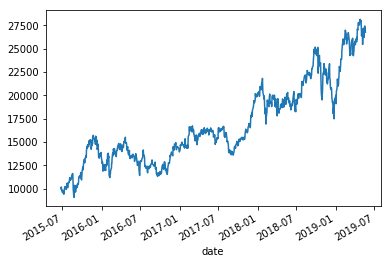

In [30]:
# Set Portfolio Weights, Calculate Daily and Cumulative Portfolio Returns, and Plot $10,000 Investment Over Time for Uncorrelated Portfolio
weights2= [0.18, 0.42, 0.52, 0.58, 0.55, -0.05, -0.28]

portfolio_returns2 = daily_returns2_drop_col.dot(weights2)

cum_return2 = (1 + portfolio_returns2).cumprod()

cum_prof2 = cum_return2 * 10000
cum_prof2.plot()

In [33]:
sharp_daily_return2 = (daily_returns2.mean() * 252) / (daily_returns2.std() * np.sqrt(252))
sharp_daily_return2

BK      0.181757
FANG    0.421292
LUV     0.520850
MU      0.435027
NKE     0.585923
SBUX    0.545402
T      -0.050216
WDC    -0.245731
WRK    -0.278511
dtype: float64

### Evaluate Investment in Original/Unoptimized Portfolio (No Modifications)

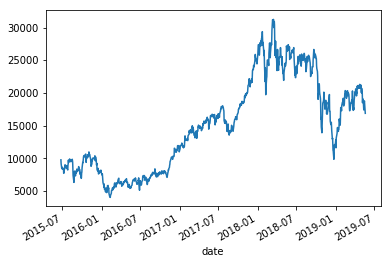

In [43]:
# Set Portfolio Weights, Calculate Daily and Cumulative Portfolio Returns, and Plot $10,000 Investment Over Time for Unoptimized Portfolio
weights3= [0.18, 0.42, 0.52, 0.44, 0.58, 0.55, 0.05, 0.25, 0.28]

portfolio_returns3 = daily_returns2.dot(weights3)

cum_return3 = (1 + portfolio_returns3).cumprod()

cum_prof3 = cum_return3 * 10000
cum_prof3.plot()

### Overlay Hypothetical Portfolio Investments

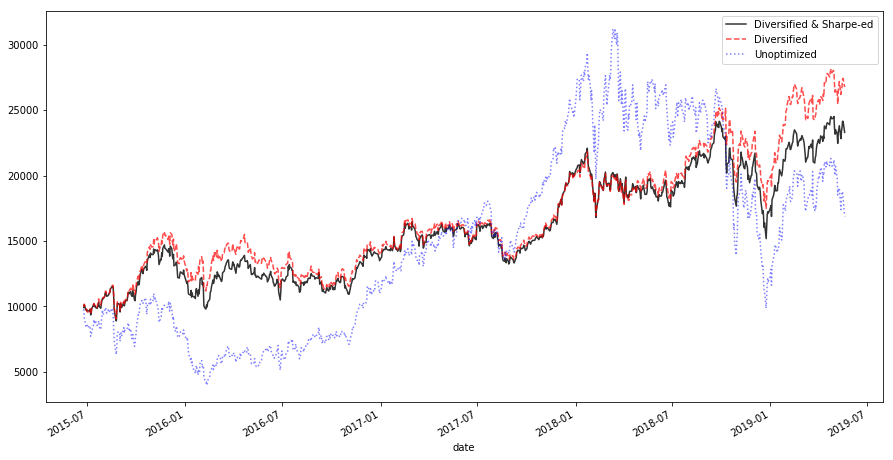

In [44]:
# Set the figure of the chart and plot each data trend on the single figure
plot1 = cum_prof1.plot(figsize=(15,8), color='k', alpha=0.8)
cum_prof2.plot(ax=plot1, color='r', linestyle='dashed', alpha=0.7)
cum_prof3.plot(ax=plot1, color='b', linestyle='dotted', alpha=0.5)
plot1.legend(['Diversified & Sharpe-ed', 'Diversified', 'Unoptimized'])